<a href="https://colab.research.google.com/github/nthang2/Hotel-rating-prediction/blob/DucMinh/hotel_rating_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import and load dataset

In [1]:
import pandas as pd
import numpy as np
# We'll also import seaborn, a Python graphing library
import seaborn as sns
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv')

## 2. Overview Data

In [3]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
df.shape

(20491, 2)

## 3. Perform EDA

In [5]:
df.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [6]:
df.isnull()

,Review,Rating
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
20486,False,False
20487,False,False
20488,False,False
20489,False,False


In [7]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

<Axes: xlabel='Rating'>

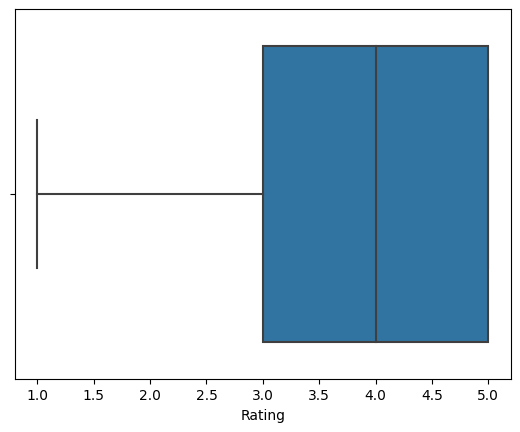

In [8]:
sns.boxplot(x = df['Rating'])

No outline in dataset

<Axes: xlabel='Rating', ylabel='count'>

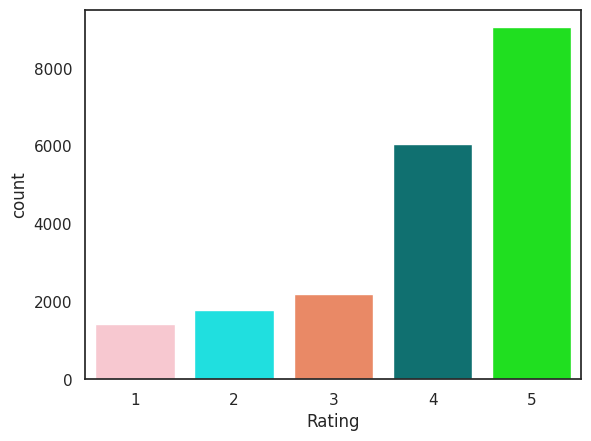

In [9]:
sns.set_theme(style="white", color_codes=True)
sns.countplot(x = df['Rating'], palette=['pink', 'Aqua','coral','teal', 'lime'])

In [3]:
df['Word_count']= df['Review'].map(lambda x: len(x.split()))
df.head(2)

,Review,Rating,Word_count
0,nice hotel expensive parking got good deal sta...,4,87
1,ok nothing special charge diamond member hilto...,2,250


<Axes: xlabel='Rating', ylabel='Word_count'>

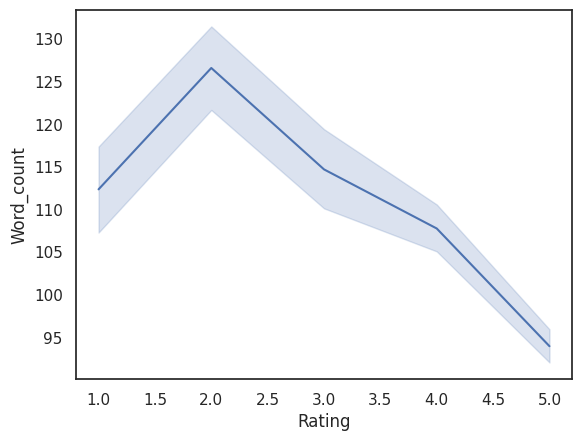

In [11]:
sns.lineplot(x='Rating', y='Word_count', data=df)

The review rate as 2 is highest

In [4]:
from textblob import TextBlob

In [5]:
def polarity(x):
    blob = TextBlob(x)
    return blob.sentiment.polarity


In [6]:
def subjectivity(x):
    blob = TextBlob(x)
    return blob.sentiment.subjectivity

In [7]:
df['polarity']= df['Review'].apply(polarity)
df['Subjectivity']= df['Review'].apply(subjectivity)

In [16]:
df.head()

,Review,Rating,Word_count,polarity,Subjectivity
0,nice hotel expensive parking got good deal sta...,4,87,0.208744,0.687000
1,ok nothing special charge diamond member hilto...,2,250,0.214923,0.495009
2,nice rooms not 4* experience hotel monaco seat...,3,217,0.294420,0.605208
3,"unique, great stay, wonderful time hotel monac...",5,89,0.504825,0.691228
4,"great stay great stay, went seahawk game aweso...",5,191,0.384615,0.629396


In [8]:
conditions = [
    (df['polarity']>0),
    (df['polarity']<0),
    (df['polarity']==0)
]
values = ['Positive','Negative','Nuetral']
df['polarity_new'] = np.select(conditions,values) #distribute

In [24]:
df.head(2)

,Review,Rating,Review_lemmatize,Review_stemming,Word_count,polarity,Subjectivity,polarity_new
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,",4,"[nice, hotel, expensive, parking, got, good, deal, stay, hotel, anniversary,, arrived, late, evening, took, advice, previous, review, did, valet, parking,, check, quick, easy,, little, disappointed, non-existent, view, room, room, clean, nice, size,, bed, comfortable, woke, stiff, neck, high, pillows,, not, soundproof, like, heard, music, room, night, morning, loud, bang, door, opening, closing, hear, people, talking, hallway,, maybe, just, noisy, neighbors,, aveda, bath, product, nice,, did, not, goldfish, stay, nice, touch, taken, advantage, staying, longer,, location, great, walking, distance, shopping,, overall, nice, experience, having, pay, 40, parking, night,]","[nice, hotel, expens, park, got, good, deal, stay, hotel, anniversary,, arriv, late, even, took, advic, previous, review, did, valet, parking,, check, quick, easy,, littl, disappoint, non-exist, view, room, room, clean, nice, size,, bed, comfort, woke, stiff, neck, high, pillows,, not, soundproof, like, heard, music, room, night, morn, loud, bang, door, open, close, hear, peopl, talk, hallway,, mayb, just, noisi, neighbors,, aveda, bath, product, nice,, did, not, goldfish, stay, nice, touch, taken, advantag, stay, longer,, locat, great, walk, distanc, shopping,, overal, nice, experi, have, pay, 40, park, night,]",87,0.208744,0.687000,Positive
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this not 4 start hotel clean business hotel super high rates, better chain hotels seattle,",2,"[ok, nothing, special, charge, diamond, member, hilton, decided, chain, shot, 20th, anniversary, seattle,, start, booked, suite, paid, extra, website, description, not,, suite, bedroom, bathroom, standard, hotel, room,, took, printed, reservation, desk, showed, said, thing, like, tv

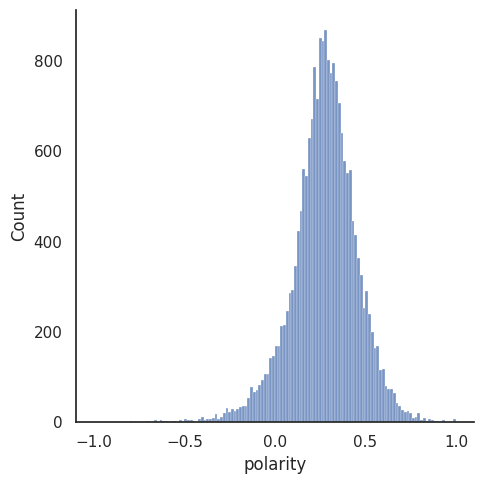

In [19]:
sns.displot(df['polarity'])

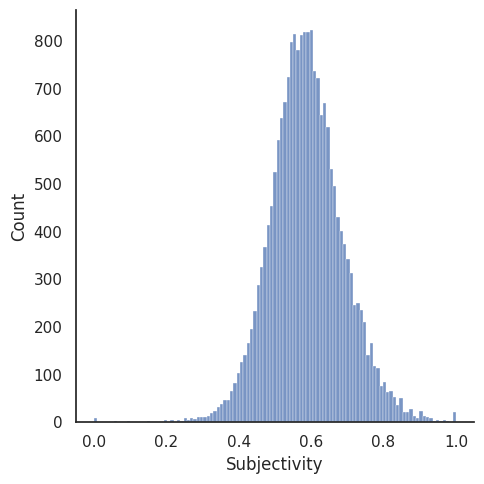

In [20]:
sns.displot(df['Subjectivity'])

<Axes: xlabel='polarity_new', ylabel='count'>

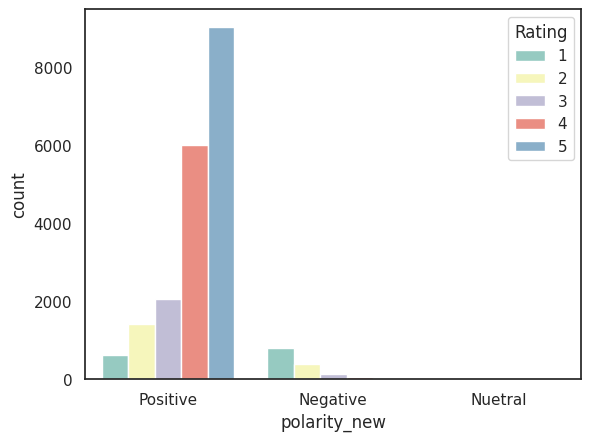

In [21]:
sns.countplot(x='polarity_new',hue='Rating',data=df, palette="Set3")

## 5.Text Cleaning(Pre-processing of data)

### A. Remove stopwords

In [9]:
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
stop = stopwords.words('english')
from nltk.tokenize import word_tokenize

In [10]:
#remove stopwords from review column
df['Review'] = df['Review'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))

In [24]:
df.head()

,Review,Rating,Word_count,polarity,Subjectivity,polarity_new
0,nice hotel expensive parking got good deal sta...,4,87,0.208744,0.687000,Positive
1,ok nothing special charge diamond member hilto...,2,250,0.214923,0.495009,Positive
2,nice rooms 4* experience hotel monaco seattle ...,3,217,0.294420,0.605208,Positive
3,"unique, great stay, wonderful time hotel monac...",5,89,0.504825,0.691228,Positive
4,"great stay great stay, went seahawk game aweso...",5,191,0.384615,0.629396,Positive


### B. Stemming

In [11]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [12]:
# Split the sentences to lists of words.
df['Review_stemming'] = df['Review'].str.split()
# Make sure we see the full column.
pd.set_option('display.max_colwidth', 1)
df['Review_stemming'] = df['Review_stemming'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

In [6]:
df.head(3)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3


### C. Lemmatization

In [13]:
#nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
df['Review_lemmatize'] = df.Review.apply(lemmatize_text)

In [8]:
df.head(2)

,Review,Rating,Review_lemmatize
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member..."


#### Make sentences

In [14]:
import re
def make_sentences(data,name):
    data[name]=data[name].apply(lambda x:' '.join([i+' ' for i in x]))
    # Removing double spaces if created
    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [15]:
make_sentences(df,'Review_stemming')
make_sentences(df,'Review_lemmatize')

In [32]:
df.head(3)

,Review,Rating,Word_count,polarity,Subjectivity,polarity_new,Review_stemming,Review_lemmatize
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe noisy neighbors, aveda bath products nice, goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,",4,87,0.208744,0.687000,Positive,"nice hotel expens park got good deal stay hotel anniversary, arriv late even took advic previous review valet parking, check quick easy, littl disappoint non-exist view room room clean nice size, bed comfort woke stiff neck high pillows, soundproof like heard music room night morn loud bang door open close hear peopl talk hallway, mayb noisi neighbors, aveda bath product nice, goldfish stay nice touch taken advantag stay longer, locat great walk distanc shopping, overal nice experi pay 40 park night,","nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous review valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, soundproof like heard music room night morning loud bang door opening closing hear people talking hallway, maybe noisy neighbors, aveda bath product nice, goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,"
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty reply solution, send email trip guest survey follow email mail, guess tell concerned guest.the staff ranged indifferent helpful, asked desk good breakfast spots neighborhood hood told hotels, gee best breakfast spots seattle 1/2 block away convenient hotel know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival champagne strawberries foam pillows great room view alley high rise building good better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this 4 start hotel clean business hotel super high rates, better chain hotels seattle,",2,250,0.214923,0.495009,Positive,"ok noth special charg diamond member hilton decid chain shot 20th anniversari seattle, start book suit paid extra websit descript not, suit bedroom bathroom standard hotel room, took print reserv desk show said thing like tv couch ect desk clerk told oh mix suit descript kimpton websit sorri free breakfast, got kidding, embassi suit sit room bathroom bedroom unlik kimpton call suite, 5 day stay offer correct fals advertising, send kimpton prefer guest websit email ask failur provid suit advertis websit reserv descript furnish hard copi reserv printou

### D. Word cloud

In [16]:
rev_stemming = " ".join([review for review in df['Review_stemming']])
rev_stemming[:200]

'nice hotel expens park got good deal stay hotel anniversary, arriv late even took advic previous review valet parking, check quick easy, littl disappoint non-exist view room room clean nice size, bed '

In [17]:
rev_lmtz = " ".join([review for review in df['Review_lemmatize']])
rev_lmtz[:200]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous review valet parking, check quick easy, little disappointed non-existent view room room cle'

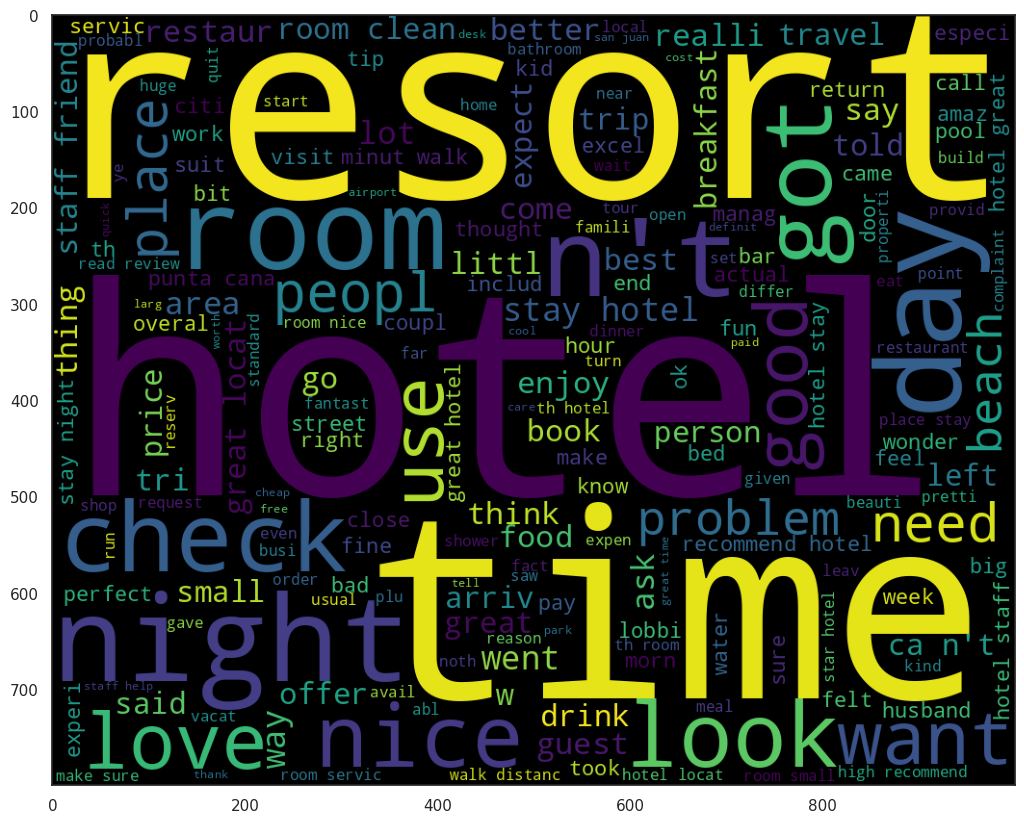

In [35]:
from wordcloud import WordCloud

plt.figure(figsize=(15,10))
wc= WordCloud(max_words=200,height= 800, width=1000 ,background_color='black').generate(rev_stemming)
plt.imshow(wc)

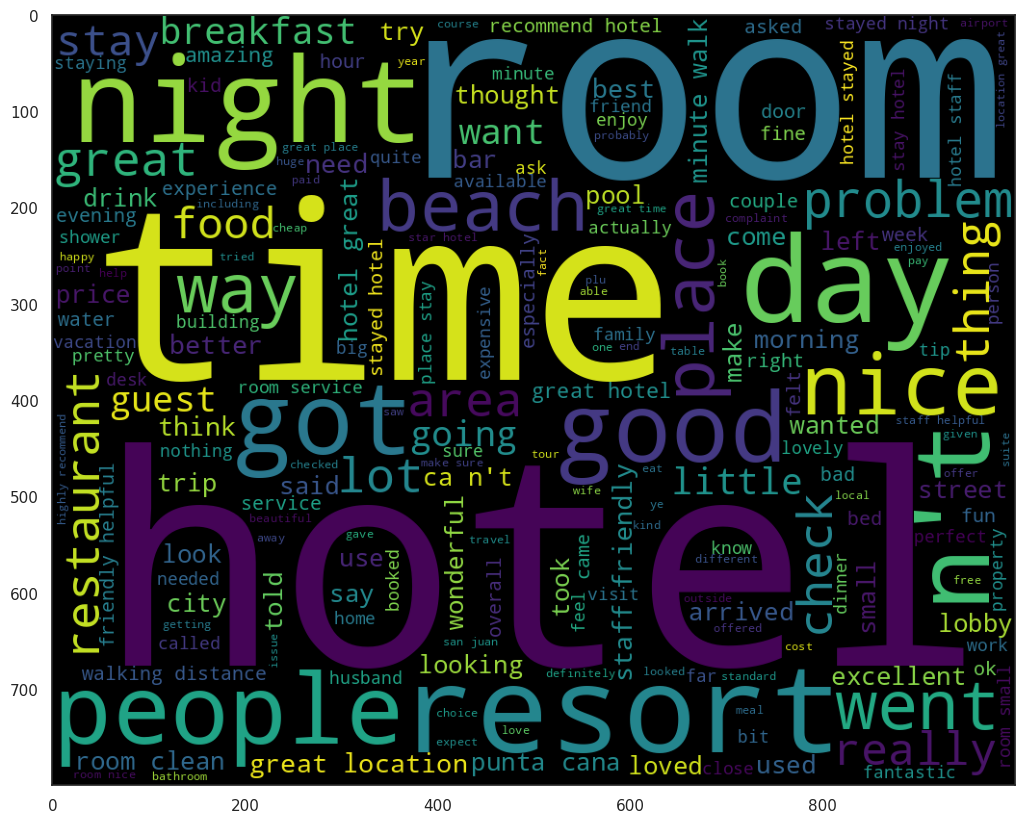

In [36]:
from wordcloud import WordCloud

plt.figure(figsize=(15,10))
wc= WordCloud(max_words=200,height= 800, width=1000 ,background_color='black').generate(rev_lmtz)
plt.imshow(wc)

#### Create sentiment feature

In [18]:
def sentiment(review):
    if review>=3:
        return 1
    else:
        return 0
df['Sentiment']= df['Rating'].apply(sentiment)

In [33]:
df.head(2)

,Review,Rating,Review_lemmatize,Review_stemming,Word_count,polarity,Subjectivity,polarity_new,Sentiment
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe noisy neighbors, aveda bath products nice, goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,",4,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous review valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, soundproof like heard music room night morning loud bang door opening closing hear people talking hallway, maybe noisy neighbors, aveda bath product nice, goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,","nice hotel expens park got good deal stay hotel anniversary, arriv late even took advic previous review valet parking, check quick easy, littl disappoint non-exist view room room clean nice size, bed comfort woke stiff neck high pillows, soundproof like heard music room night morn loud bang door open close hear peopl talk hallway, mayb noisi neighbors, aveda bath product nice, goldfish stay nice touch taken advantag stay longer, locat great walk distanc shopping, overal nice experi pay 40 park night,",87,0.208744,0.687000,Positive,1
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty reply solution, send email trip guest survey follow email mail, guess tell concerned guest.the staff ranged indifferent helpful, asked desk good breakfast spots neighborhood hood told hotels, gee best breakfast spots seattle 1/2 block away convenient hotel know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival champagne strawberries foam pillows great room view alley high rise building good better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this 4 start hotel clean business hotel super high rates, better chain hotels seattle,",2,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said thing like tv couch ect desk clerk told oh mixed suite description kimpton website sorry free breakfast, got kidding, embassy suit sitting room bathroom bedroom unlike kimpton call suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation descri

# 6.Creating our model and find best model by grid search

We will use 4 model to learn this problem. It's Logistic regression, Randomforest, SVM and Naive Bayes

In [19]:
from sklearn.model_selection import train_test_split
X= df['Review_stemming']
Y= df['Sentiment']

X_train, X_test,y_train, y_test= train_test_split(X, Y, test_size=0.25, stratify=Y)

### Vectorization(Tfidf)

In [20]:
#nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=10000, tokenizer= word_tokenize,ngram_range=(1,2) )
X_train_tfidf= tfidf.fit_transform(X_train.values)
X_test_tfidf= tfidf.transform(X_test.values)

In [36]:
X_tfidf= tfidf.fit_transform(X.values)

### 6A. Logistic regression

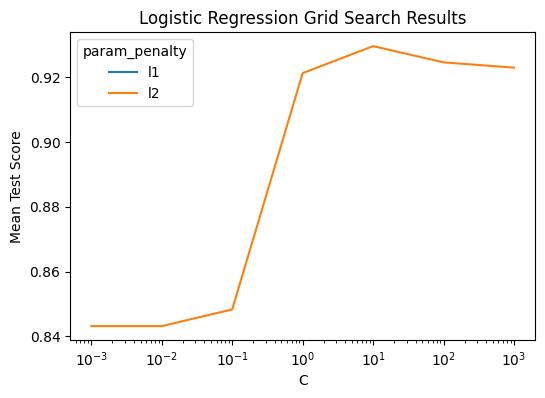

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# create a dictionary of all values we want to test
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'penalty': ['l1', 'l2']
             }

# logistic regression model
logreg = LogisticRegression()

# use gridsearch to test all values
logreg_grid = GridSearchCV(logreg, param_grid)
logreg_grid.fit(X_train_tfidf,y_train)

# convert the results to a DataFrame
results = pd.DataFrame(logreg_grid.cv_results_)

# plot the mean test scores for each value of C
plt.figure(figsize=(6, 4))
sns.lineplot(data=results, x='param_C', y='mean_test_score', hue='param_penalty')

plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.title('Logistic Regression Grid Search Results')
plt.show()


Thus, the best solution is

In [39]:
print("Best parameters found: ", logreg_grid.best_params_)
print("Best score: ", logreg_grid.best_score_)

Best parameters found:  {'C': 10, 'penalty': 'l2'}
Best score:  0.9295289148185732


In [40]:
from sklearn.linear_model import LogisticRegression

best_lr=logreg_grid.best_estimator_ 
best_lr.fit(X_train_tfidf, y_train)

LogisticRegression(C=10)

In [42]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred_tfidf = best_lr.predict(X_test_tfidf)

print(confusion_matrix(y_test,y_pred_tfidf))
print(accuracy_score(y_test,y_pred_tfidf))
print(classification_report(y_test,y_pred_tfidf))
print(accuracy_score(y_test, y_pred_tfidf))

[[ 572  232]
 [ 134 4185]]
0.9285574858481359
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       804
           1       0.95      0.97      0.96      4319

    accuracy                           0.93      5123
   macro avg       0.88      0.84      0.86      5123
weighted avg       0.93      0.93      0.93      5123

0.9285574858481359


### 6B. Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# random forest model
rf = RandomForestClassifier()

# use gridsearch to test all values
rf_grid = GridSearchCV(rf, param_grid, cv=5)
rf_grid.fit(X_train_tfidf,y_train)

# convert the results to a DataFrame
results = pd.DataFrame(rf_grid.cv_results_)

In [45]:
print("Best parameters found: ", rf_grid.best_params_)
print("Best score: ", rf_grid.best_score_)

Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}
Best score:  0.8906165966682341


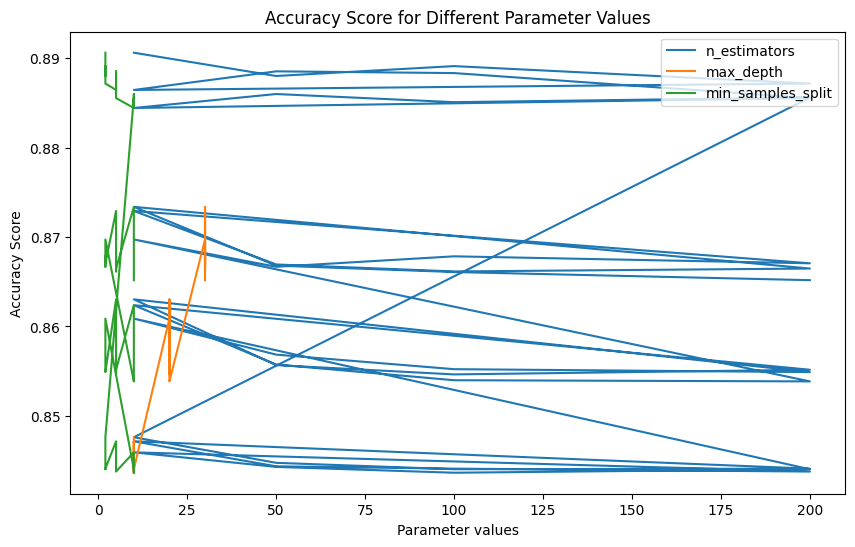

In [49]:
import matplotlib.pyplot as plt

# Lấy danh sách các tham số được thử nghiệm và điểm số tương ứng
params = rf_grid.cv_results_['params']
mean_scores = rf_grid.cv_results_['mean_test_score']

# Trích xuất các giá trị siêu tham số từ danh sách params
n_estimators = [param['n_estimators'] for param in params]
max_depth = [param['max_depth'] for param in params]
min_samples_split = [param['min_samples_split'] for param in params]

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, mean_scores, label='n_estimators')
plt.plot(max_depth, mean_scores, label='max_depth')
plt.plot(min_samples_split, mean_scores, label='min_samples_split')
plt.xlabel('Parameter values')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for Different Parameter Values')
plt.legend()
plt.show()

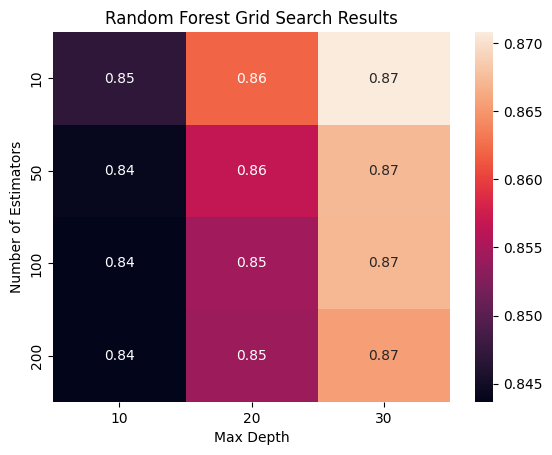

In [28]:
pivot = results.pivot_table(values='mean_test_score', index='param_n_estimators', columns='param_max_depth')

# create a heatmap of the pivot table
sns.heatmap(pivot, annot=True)
plt.xlabel('Max Depth')
plt.ylabel('Number of Estimators')
plt.title('Random Forest Grid Search Results')
plt.show()


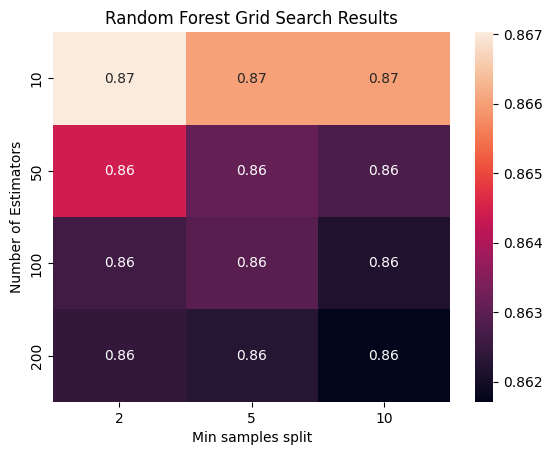

In [32]:
pivot = results.pivot_table(values='mean_test_score', index='param_n_estimators', columns='param_min_samples_split')

# create a heatmap of the pivot table
sns.heatmap(pivot, annot=True)
plt.xlabel('Min samples split')
plt.ylabel('Number of Estimators')
plt.title('Random Forest Grid Search Results')
plt.show()


In [33]:
print("Best parameters found: ", rf_grid.best_params_)
print("Best score: ", rf_grid.best_score_)

Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best score:  0.8882744350706225


#### Thus, we will use the best parameters with test date to learn

In [46]:
from sklearn.ensemble import RandomForestClassifier
clf = rf_grid.best_estimator_
clf.fit(X_train_tfidf,y_train)
y_pred = clf.predict(X_test_tfidf)

In [47]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 347  457]
 [ 100 4219]]
              precision    recall  f1-score   support

           0       0.78      0.43      0.55       804
           1       0.90      0.98      0.94      4319

    accuracy                           0.89      5123
   macro avg       0.84      0.70      0.75      5123
weighted avg       0.88      0.89      0.88      5123

0.8912746437634199


### 6C. SVM

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


# create a dictionary of all values we want to test
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1], 
              'kernel': ['linear', 'rbf']}

# SVM model
svc = SVC()

# use gridsearch to test all values
svc_grid = GridSearchCV(svc, param_grid, cv=5)
svc_grid.fit(X_train_tfidf,y_train)

# convert the results to a DataFrame
results = pd.DataFrame(svc_grid.cv_results_)

Training time is 150 minutes

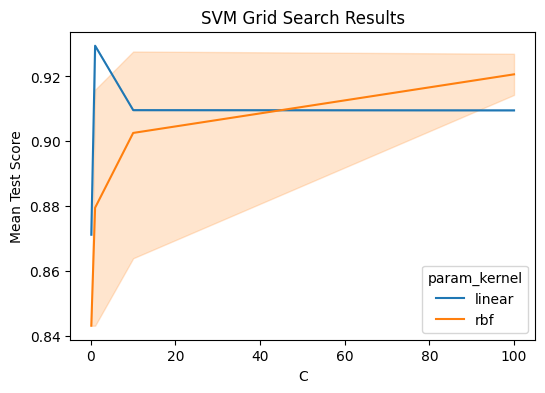

In [22]:
import matplotlib.pyplot as plt
# plot the mean test scores for each combination of hyperparameters
plt.figure(figsize=(6, 4))
sns.lineplot(data=results, x='param_C', y='mean_test_score', hue='param_kernel',)
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.title('SVM Grid Search Results')
plt.show()

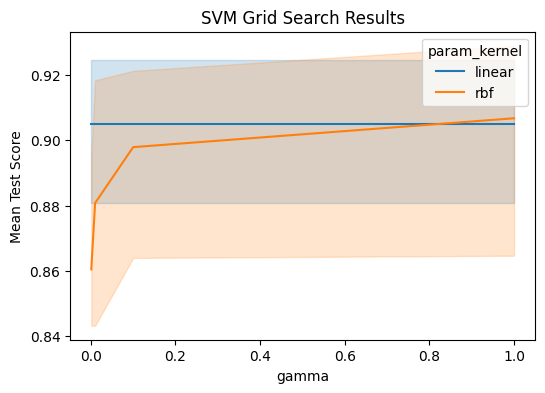

In [33]:
import matplotlib.pyplot as plt
# plot the mean test scores for each combination of hyperparameters
plt.figure(figsize=(6, 4))
sns.lineplot(data=results, x='param_gamma', y='mean_test_score', hue='param_kernel',)
plt.xlabel('gamma')
plt.ylabel('Mean Test Score')
plt.title('SVM Grid Search Results')
plt.show()

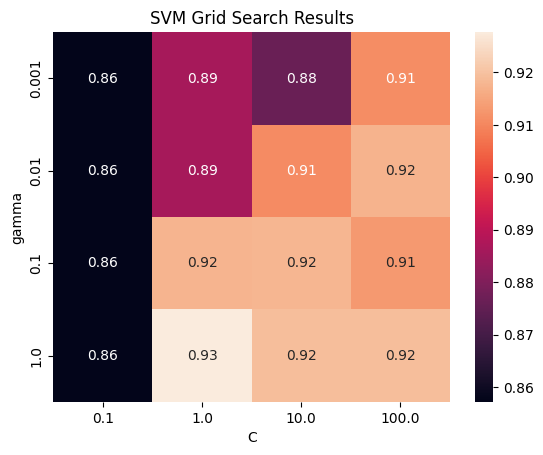

In [27]:
pivot = results.pivot_table(values='mean_test_score', index='param_gamma', columns='param_C')

# create a heatmap of the pivot table
sns.heatmap(pivot, annot=True)
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('SVM Grid Search Results')
plt.show()

In [23]:
print("Best parameters found: ", svc_grid.best_params_)
print("Best score: ", svc_grid.best_score_)

Best parameters found:  {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
Best score:  0.9294644881723222


In [34]:
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
model = svm.SVC(C=1, gamma=1.0, kernel='linear')
y_pred  =  model.fit(X_train_tfidf,y_train).predict(X_test_tfidf)

In [35]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 559  245]
 [ 115 4204]]
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       804
           1       0.94      0.97      0.96      4319

    accuracy                           0.93      5123
   macro avg       0.89      0.83      0.86      5123
weighted avg       0.93      0.93      0.93      5123

0.9297286746047237


### 6D. Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

X_train_tfidf_array = X_train_tfidf.toarray()
X_test_tfidf_array = X_test_tfidf.toarray()

param_grid = {'priors': [None, [0.25, 0.25, 0.5], [0.1, 0.5, 0.4]],
              'var_smoothing': [1e-9, 1e-7, 1e-5]}

nb_model = GaussianNB()

# Thực hiện grid search
nb_grid = GridSearchCV(nb_model, param_grid)
nb_grid.fit(X_train_tfidf_array,y_train)

GridSearchCV(estimator=GaussianNB(),
             param_grid={'priors': [None, [0.25, 0.25, 0.5], [0.1, 0.5, 0.4]],
                         'var_smoothing': [1e-09, 1e-07, 1e-05]})

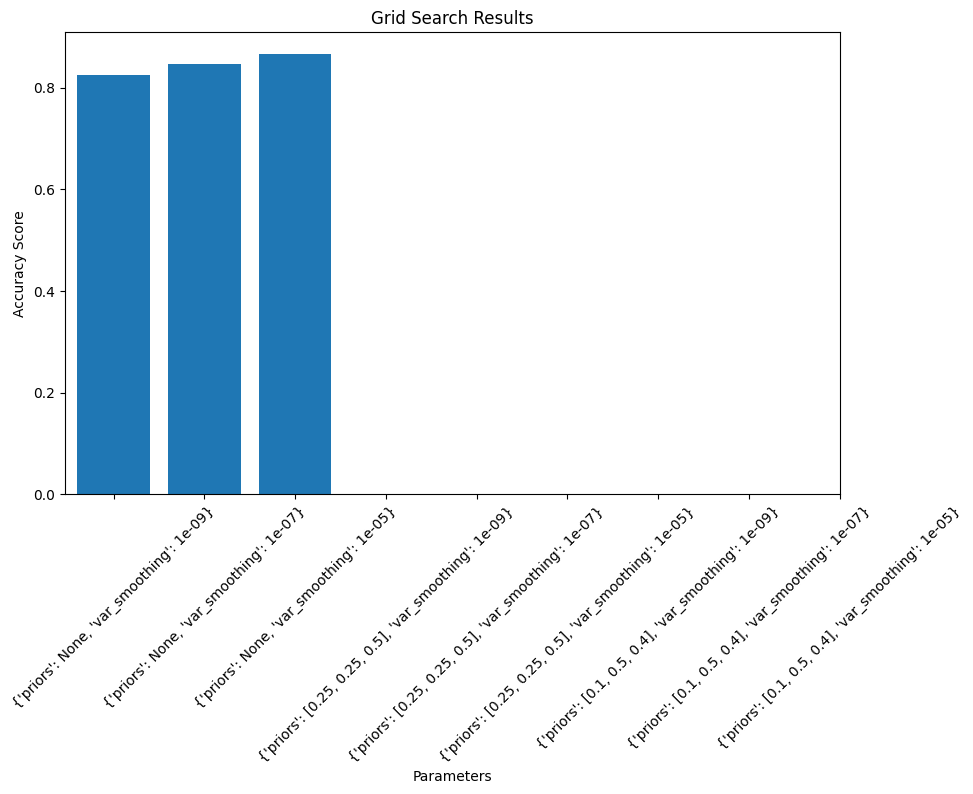

In [44]:
import matplotlib.pyplot as plt

# Lấy các thông số từ kết quả grid search
params = nb_grid.cv_results_['params']
mean_scores = nb_grid.cv_results_['mean_test_score']

# Biểu đồ thể hiện accuracy score
plt.figure(figsize=(10, 6))
plt.bar(range(len(params)), mean_scores)
plt.xticks(range(len(params)), [str(param) for param in params], rotation=45)
plt.xlabel('Parameters')
plt.ylabel('Accuracy Score')
plt.title('Grid Search Results')
plt.show()

In [40]:
print("Các tham số tốt nhất:", nb_grid.best_params_)
print("Điểm chính xác tốt nhất:", nb_grid.best_score_)

Các tham số tốt nhất: {'priors': None, 'var_smoothing': 1e-05}
Điểm chính xác tốt nhất: 0.8660201630207988


In [45]:
X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB(priors=None, var_smoothing=1e-05)
y_pred  =  nb_model.fit(X_train_tfidf,y_train).predict(X_test_tfidf)

In [46]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 552  252]
 [ 434 3885]]
              precision    recall  f1-score   support

           0       0.56      0.69      0.62       804
           1       0.94      0.90      0.92      4319

    accuracy                           0.87      5123
   macro avg       0.75      0.79      0.77      5123
weighted avg       0.88      0.87      0.87      5123

0.8660940854967792


# 7.Conclusion

#### Thus, the accuray score after finding a best paramater applying to the test set for each model will be:
- Logistic Regression: 0.9286
- Random Forest: 0.8913
- Support Vector Machine: 0.9297
- Naive Bayes: 0.8661



## Hence, after the prediction from diffrent type of algorithm with many paramaters, I concluded that the Support Vetor Machine gives maximum accuracy. Still if we compare with rest model we found that Naive Bayes gives lowest accuray